<a href="https://colab.research.google.com/github/Meenakshigupta6527/Mobile-Price-Prediction/blob/main/Mobile_Prize_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
#mounting Google Drive in Google Colab

from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
#importing pandas & numpy libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Disable warnings
import warnings
warnings.filterwarnings('ignore')


#**Data Exploration:**

In [196]:
#loading dataset

df = pd.read_excel('/content/drive/MyDrive/Processed_Flipdata.xlsx')

In [197]:
#display dataset

df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


In [198]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [199]:
#check shape of data

df.shape


(541, 12)

#**Data Cleaning**

#**Null Values**

In [200]:
# check null values

df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [201]:
#checking information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [202]:

#drop unnecessary column

df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [203]:
df.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


In [204]:

#again check shape of data

df.shape

(541, 11)

#**Data Preprocessing:**

In [205]:
#finding numerical columns from the dataset

numerical_columns = df.select_dtypes(include=['float','int']).columns
numerical_columns

Index(['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize'], dtype='object')

In [206]:
#finding categorical columns from the dataset

categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_'], dtype='object')

#**Ordinal Encoding**

In [207]:
from sklearn.preprocessing import OrdinalEncoder

In [208]:
ordinal_columns = ['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_']

In [209]:
encoder = OrdinalEncoder()

In [210]:
df[ordinal_columns] = encoder.fit_transform(df[ordinal_columns])

In [211]:
df[ordinal_columns]

,Model,Colour,Rear Camera,Front Camera,Processor_
0,23.0,159.0,3.0,10.0,113.0
1,23.0,20.0,3.0,10.0,113.0
2,37.0,149.0,10.0,4.0,75.0
3,69.0,201.0,13.0,10.0,56.0
4,12.0,130.0,10.0,10.0,14.0
...,...,...,...,...,...
536,118.0,49.0,10.0,2.0,89.0
537,32.0,52.0,11.0,6.0,68.0
538,123.0,259.0,10.0,12.0,35.0
539,110.0,17.0,10.0,7.0,11.0


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    float64
 1   Colour         541 non-null    float64
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    float64
 6   Front Camera   541 non-null    float64
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    float64
 10  Prize          541 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 46.6 KB


###Now we have converted all categorical columns to numerical columns

In [213]:
# Changing the Datatype (converting float to int)

df['Model'] = df['Model'].astype('int64')
df['Colour'] = df['Colour'].astype('int64')
df['Rear Camera'] = df['Rear Camera'].astype('int64')
df['Front Camera'] = df['Front Camera'].astype('int64')
df['Rear Camera'] = df['Rear Camera'].astype('int64')
df['Mobile Height'] = df['Mobile Height'].astype('int64')
df['Processor_'] = df['Processor_'].astype('int64')

In [214]:
df.dtypes

Model            int64
Colour           int64
Memory           int64
RAM              int64
Battery_         int64
Rear Camera      int64
Front Camera     int64
AI Lens          int64
Mobile Height    int64
Processor_       int64
Prize            int64
dtype: object

#Outliers

In [215]:
#importing seaborn

import seaborn as sns

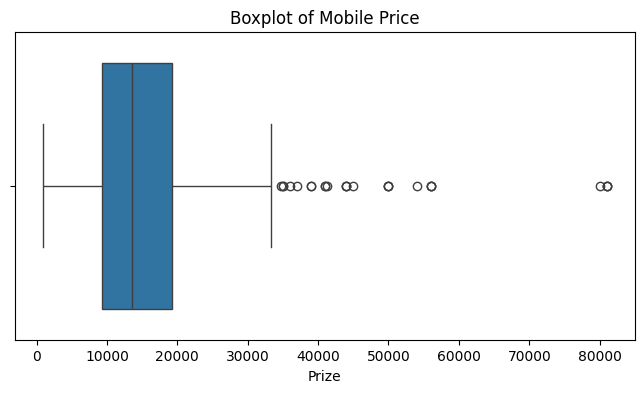

In [216]:
# Boxplots can help identify outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Prize'])
plt.title(f'Boxplot of Mobile Price')
plt.show()

In [217]:
Q1 = df['Prize'].quantile(.25)
Q3 = df['Prize'].quantile(.75)
IQR = Q3 - Q1

lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
lower_range, upper_range

(-5695.0, 34265.0)

In [218]:
df_new = df[(df.Prize > lower_range) & (df.Prize<upper_range)]
df_new.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,23,159,64,4,6000,3,10,1,16,113,7299
1,23,20,64,4,6000,3,10,1,16,113,7299
2,37,149,128,8,5000,10,4,0,16,75,11999
3,69,201,32,2,5000,13,10,0,16,56,5649
4,12,130,128,8,5000,10,10,1,16,14,8999


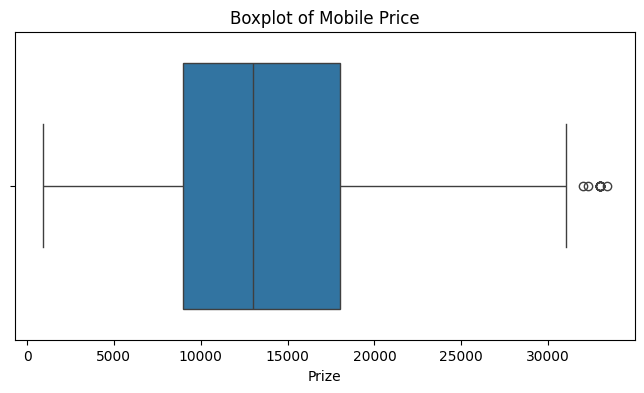

In [219]:
# Boxplots to check outliers after removing
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_new['Prize'])
plt.title(f'Boxplot of Mobile Price')
plt.show()

In [220]:
df_new.shape

(516, 11)

In [221]:
# Finding out the correlation between the features
corr = df_new.corr()
corr.shape

(11, 11)

In [222]:
df_new.corr()['Prize'].sort_values(ascending= False)

Prize            1.000000
Memory           0.703039
RAM              0.672437
Mobile Height    0.261582
Battery_         0.128707
Model            0.124724
Rear Camera      0.062845
Colour           0.059243
Processor_      -0.098242
AI Lens         -0.173608
Front Camera    -0.386461
Name: Prize, dtype: float64

<Axes: >

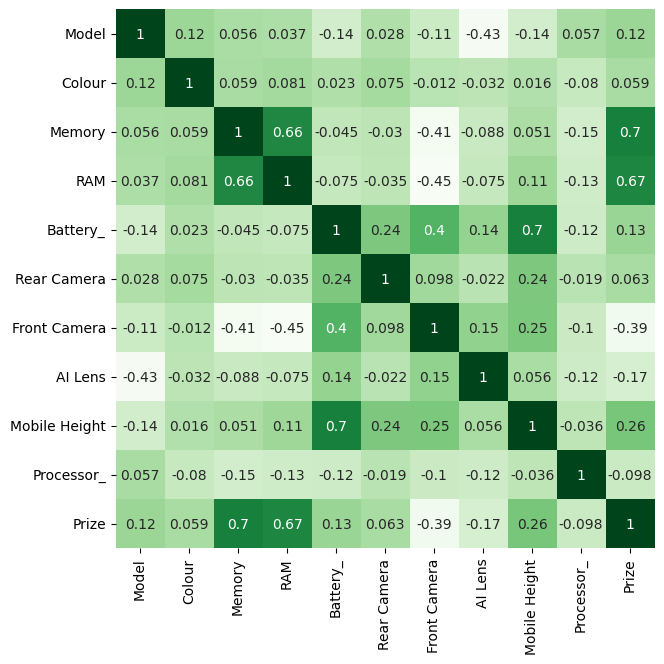

In [223]:
# Plotting the heatmap of correlation between features

plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar=False, square= True,annot=True, cmap='Greens')

##Memory, Mobile Height,Colour and RAM are positively correlated with prize than other features

#Exploratory Data Analysis

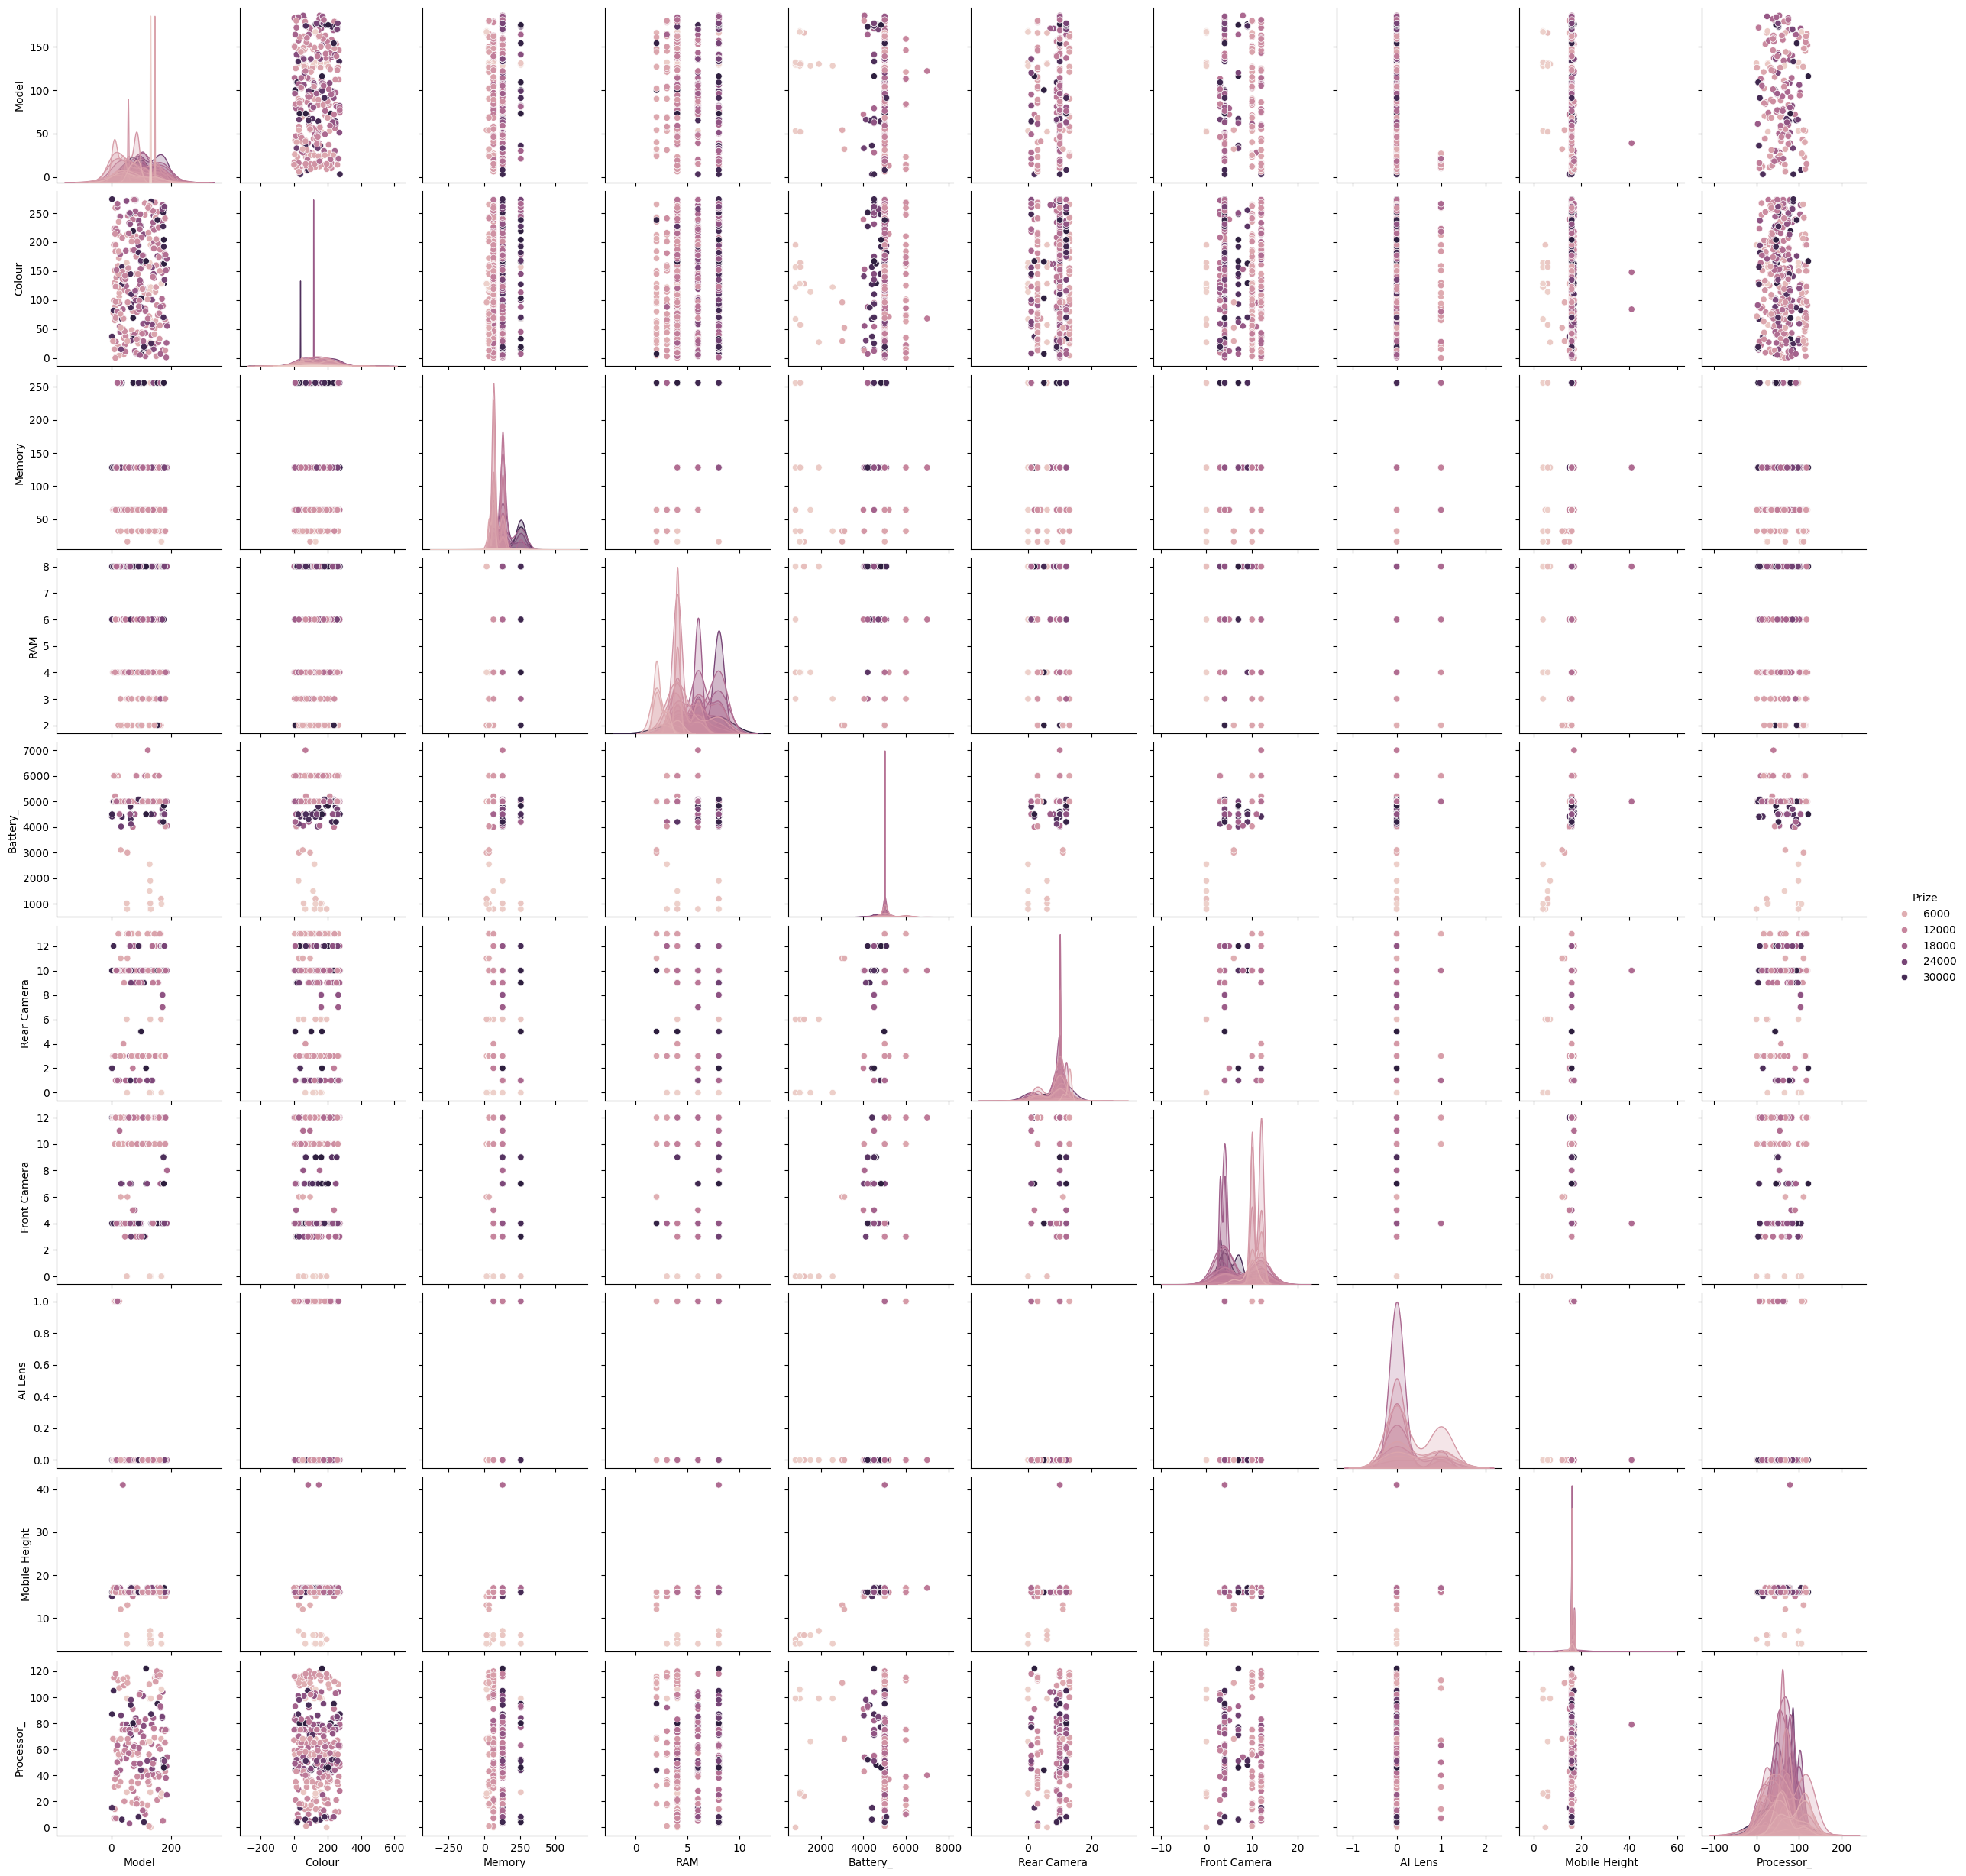

In [224]:
sns.pairplot(df_new,hue='Prize')

##The plot shows that there is a positive correlation between the price of a phone and the following features:

###1. Processor: Phones with higher processor scores tend to be more expensive.
###2. Battery: Phones with larger batteries tend to be more expensive.
###3. Rear camera: Phones with higher rear camera megapixels tend to be more expensive.
###4. Front camera: Phones with higher front camera megapixels tend to be more expensive.
###5. Memory: Phones with more memory tend to be more expensive.

###Overall, the plot suggests that there are several factors that contribute to the price of a mobile phone. Phones with better features, such as a higher processor, more memory, and a better camera, tend to be more expensive.

#check How does RAM is affected by prize

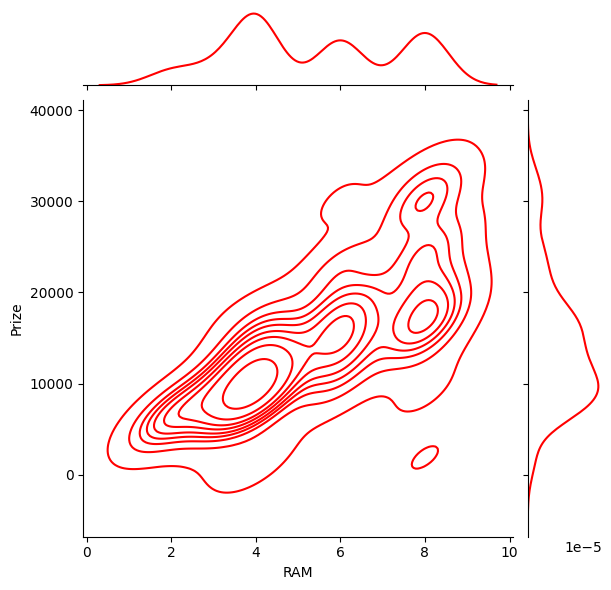

In [225]:
sns.jointplot(x='RAM',y='Prize',data=df_new,color='red',kind='kde');

##This is a jointplot showing the relationship between RAM and Prize. The plot shows a strong positive correlation between RAM and Price. As RAM increases, the price of the device also increases. This indicates that RAM is a significant factor influencing the price of a device.

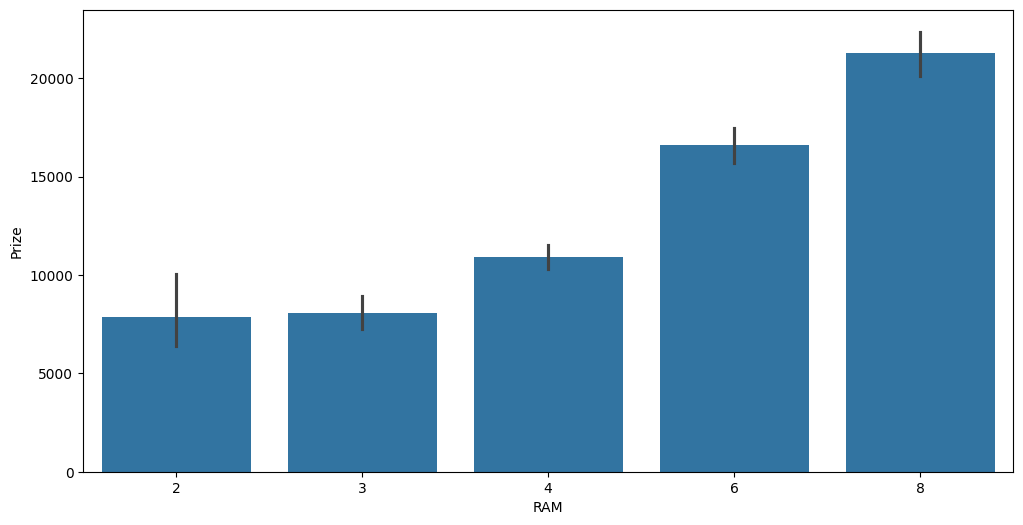

In [226]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'RAM', y = 'Prize',data=df_new)
plt.show()

##The chart shows that laptops with higher RAM sizes have higher average prices. The average price increases with increasing RAM size. The error bars represent the standard deviation of the price for each RAM size.

#check How does Memory is affected by prize

<Axes: xlabel='Memory', ylabel='Prize'>

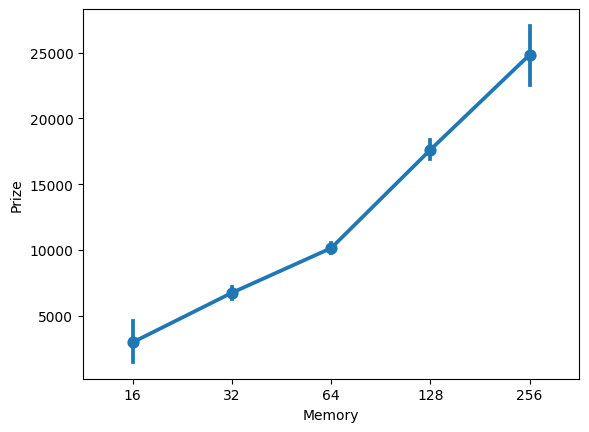

In [227]:
sns.pointplot(y="Prize", x="Memory", data=df_new)

###The plot shows the relationship between the amount of memory and the prize. There is a positive correlation between the two. As the amount of memory increases, the prize increases. The relationship is not linear, but rather has a slightly curved shape.

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_new)
data_scaled

array([[-1.48160929,  0.30992968, -0.74413195, ...,  0.0509271 ,
         1.62443089, -1.00084875],
       [-1.48160929, -1.4517914 , -0.74413195, ...,  0.0509271 ,
         1.62443089, -1.00084875],
       [-1.20862558,  0.18318716,  0.3390051 , ...,  0.0509271 ,
         0.42955371, -0.35572715],
       ...,
       [-1.30611976, -1.04621533, -1.28570047, ..., -1.51793172,
         0.20944476, -1.17942389],
       [ 0.46827439,  1.57735493, -0.74413195, ...,  0.0509271 ,
        -0.82821174, -0.63148232],
       [-0.77965117,  1.01968782,  0.3390051 , ...,  0.0509271 ,
        -0.13644074,  0.1933125 ]])

#**Model Building**:

In [229]:
X=df_new.drop('Prize',axis=1)

In [230]:
y=df_new['Prize']

In [231]:
#Splitting the data

from sklearn.model_selection import train_test_split

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [233]:
#Linear Regression Model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [234]:
lm.fit(X_train,y_train)

LinearRegression()

In [235]:
lm.score(X_test,y_test)

0.6540149709992026

In [236]:
predictions = lm.predict(X_test)
predictions

array([ 8805.10485517,  7760.29346025, 10232.1889076 , 10508.10859618,
       12311.79354136,  6261.37367558, 17141.24576243,  9627.08717087,
       11158.63886739, 17562.79571501, 16013.86131855, 10787.56702299,
        8289.59293225, 14315.60464089, 11791.06887833,  8810.23742823,
        9978.22327052,  7687.20997553, 20948.66105897, 16450.83492352,
       20291.77092778, 26180.543046  ,  7117.65636736, 10669.04001367,
        4278.31942017, 17879.58621025,  7451.62547235, 21225.67497001,
       26140.24637801, 19015.4446566 ,   629.37929693, 26171.07017126,
       21186.06678272,  6827.55810297, 17651.70665154, 20424.16275249,
       12035.33503841, 12588.57813549,  6261.21878215, 14930.87668829,
       20358.26726685,  8363.04116002, 16740.10877141, 18047.24573366,
       12169.10399775, 21495.82405072, 15680.66762652,  7081.76649386,
       13244.21626132, 17554.41726458, 15933.37210657, 20631.69549993,
        6193.6401901 , 14153.41451547, 12329.45139277,  6943.24570398,
      

In [237]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 18067626.24988675
R-squared: 0.6540149709992026


In [238]:
#Decision Tree Model

from sklearn.tree import DecisionTreeRegressor
DTreg = DecisionTreeRegressor(random_state = 0)
DTreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [239]:
DTreg.score(X_test,y_test)

0.6820543968725861

In [240]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = DTreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 16603384.087719299
R-squared: 0.6820543968725861


In [175]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [176]:
rfc.score(X_test,y_test)


0.8949477184136857

In [193]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = rfc.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 5485917.601350932
R-squared: 0.8949477184136857
